C:\Anaconda\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


Estimated number of clusters: 11
Cluster 0 center coordinates: [25  5]
Cluster 1 center coordinates: [28 82]
Cluster 2 center coordinates: [28 32]
Cluster 3 center coordinates: [46 51]
Cluster 4 center coordinates: [60 52]
Cluster 5 center coordinates: [67 40]
Cluster 6 center coordinates: [77 12]
Cluster 7 center coordinates: [78 90]
Cluster 8 center coordinates: [78 73]
Cluster 9 center coordinates: [103  85]
Cluster 10 center coordinates: [103  23]


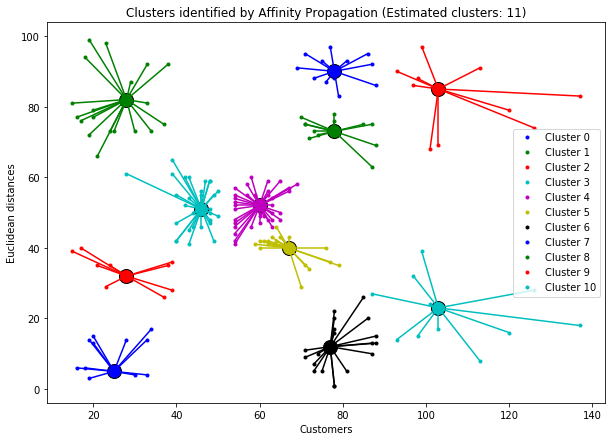

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AffinityPropagation
from itertools import cycle


dataset = pd.read_csv('Mall_Customers.csv')


X = dataset.iloc[:, [3, 4]].values


aff = AffinityPropagation()
y_aff = aff.fit_predict(X)
cluster_centers_indices = aff.cluster_centers_indices_
labels = aff.labels_


n_clusters_ = len(cluster_centers_indices)
print(f"Estimated number of clusters: {n_clusters_}")


for k in range(n_clusters_):
    print(f"Cluster {k} center coordinates: {X[cluster_centers_indices[k]]}")


plt.figure(figsize=(10, 7))
colors = cycle('bgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.', label=f'Cluster {k}')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, 
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title(f'Clusters identified by Affinity Propagation (Estimated clusters: {n_clusters_})')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.legend()
plt.show()
